In [25]:
"""
Objetivo: Explorar la dinámica de los listados de productos en Amazon Reino Unido para extraer información empresarial procesable. 
Al comprender la distribución, las tendencias centrales y las relaciones de varios atributos de los productos, 
las empresas pueden tomar decisiones más informadas sobre el posicionamiento de los productos, las estrategias de precios 
y la gestión de inventarios.

Conjunto de datos: Este laboratorio utiliza el conjunto de datos de productos de Amazon UK, 
que proporciona información sobre categorías de productos, marcas, precios, valoraciones, etc. de Amazon UK. 
Deberá descargarlo para empezar a trabajar con él.

"""

'\nObjetivo: Explorar la dinámica de los listados de productos en Amazon Reino Unido para extraer información empresarial procesable. \nAl comprender la distribución, las tendencias centrales y las relaciones de varios atributos de los productos, \nlas empresas pueden tomar decisiones más informadas sobre el posicionamiento de los productos, las estrategias de precios \ny la gestión de inventarios.\n\nConjunto de datos: Este laboratorio utiliza el conjunto de datos de productos de Amazon UK, \nque proporciona información sobre categorías de productos, marcas, precios, valoraciones, etc. de Amazon UK. \nDeberá descargarlo para empezar a trabajar con él.\n\n'

In [26]:
import pandas as pd

# Especifica la ruta del archivo CSV
ruta_archivo = '/Users/aliciacaminero/Documents/CURSOS/DATA ANALYSIS BOOTCAMP IRONHACK/LABORATORIOS/lab-eda-univariate/amz_uk_price_prediction_dataset.csv'

# Cargar el CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

# Ver las primeras filas del DataFrame
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
# Tipos de datos de cada columna

df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [28]:
# Eliminar filas con valores nulos
df = df.dropna()

In [29]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [30]:
"""

Parte 1: Entender las categorías de productos
    Pregunta empresarial: ¿Cuáles son las categorías de productos más populares en Amazon España, 
    y cómo se comparan en términos de frecuencia de anuncios?

Tablas de frecuencia:
    Genere una tabla de frecuencias para la categoría de productos.
    ¿Cuáles son las 5 categorías de productos más listadas?

Visualizaciones:

    Visualice la distribución de los productos en las distintas categorías mediante un gráfico de barras. 
    Si tiene problemas para entender el gráfico, hágalo para un subconjunto de categorías principales.
    Para un subconjunto de las categorías principales, visualice sus proporciones mediante un gráfico circular. 
    ¿Hay alguna categoría que domine los listados?

"""


'\n\nParte 1: Entender las categorías de productos\n    Pregunta empresarial: ¿Cuáles son las categorías de productos más populares en Amazon España, \n    y cómo se comparan en términos de frecuencia de anuncios?\n\nTablas de frecuencia:\n    Genere una tabla de frecuencias para la categoría de productos.\n    ¿Cuáles son las 5 categorías de productos más listadas?\n\nVisualizaciones:\n\n    Visualice la distribución de los productos en las distintas categorías mediante un gráfico de barras. \n    Si tiene problemas para entender el gráfico, hágalo para un subconjunto de categorías principales.\n    Para un subconjunto de las categorías principales, visualice sus proporciones mediante un gráfico circular. \n    ¿Hay alguna categoría que domine los listados?\n\n'

In [31]:
# Generar una tabla de frecuencias para la columna 'Categoría' (ajustar el nombre según tu archivo)
tabla_frecuencias = df['category'].value_counts()

# Mostrar la tabla de frecuencias
tabla_frecuencias

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [32]:
# Obtener las 5 categorías más listadas
top_5_categorias = tabla_frecuencias.head(5)

# Mostrar las 5 categorías más listadas
print(top_5_categorias)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


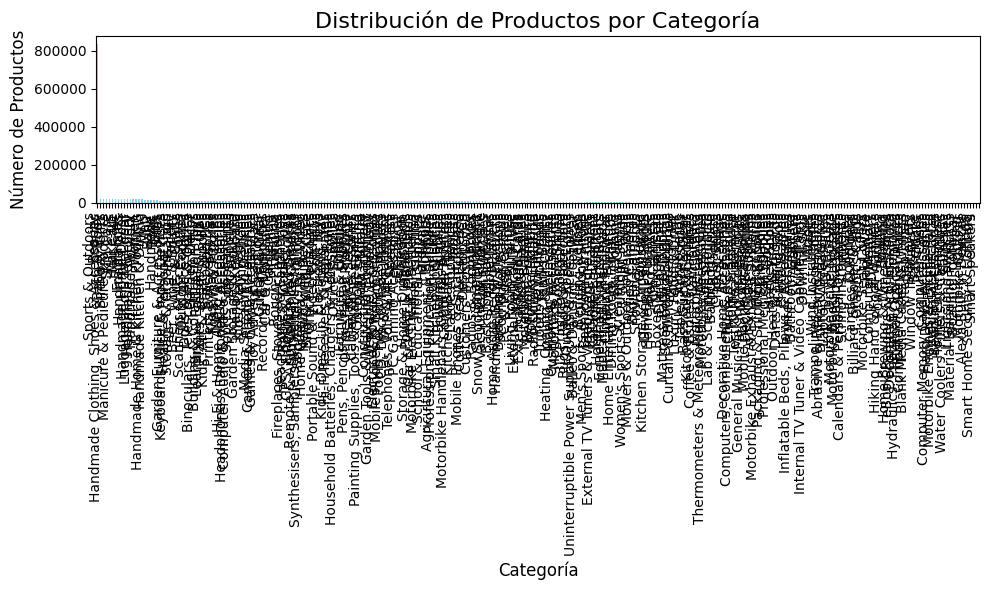

In [33]:
# Gráfico de Barras para la Distribución de Productos por Categoría

import matplotlib.pyplot as plt

# Crear un gráfico de barras para mostrar la distribución de productos en las categorías
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
tabla_frecuencias.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución de Productos por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Productos', fontsize=12)

# Rotar las etiquetas del eje x para que no se solapen
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

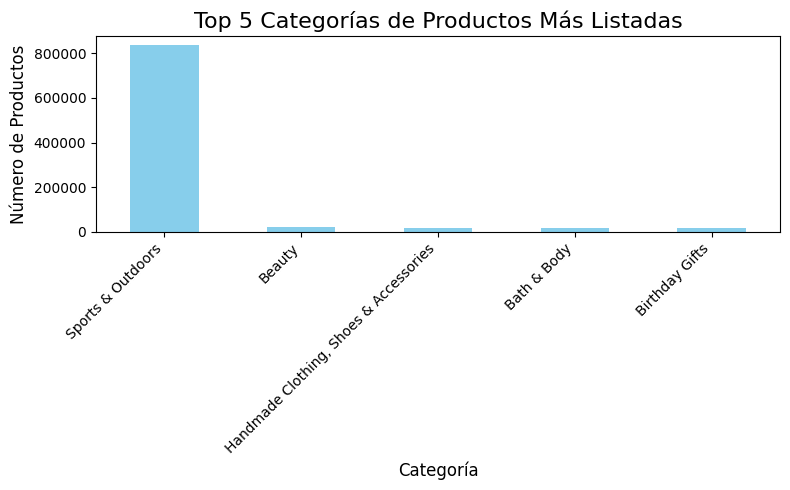

In [34]:
# Visualización de un Subconjunto de Categorías Principales

# Obtener las 5 categorías más frecuentes
top_5_categorias = tabla_frecuencias.head(5)

# Crear un gráfico de barras para las 5 categorías más frecuentes
plt.figure(figsize=(8, 5))
top_5_categorias.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Top 5 Categorías de Productos Más Listadas', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Productos', fontsize=12)

# Rotar las etiquetas del eje x para que no se solapen
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

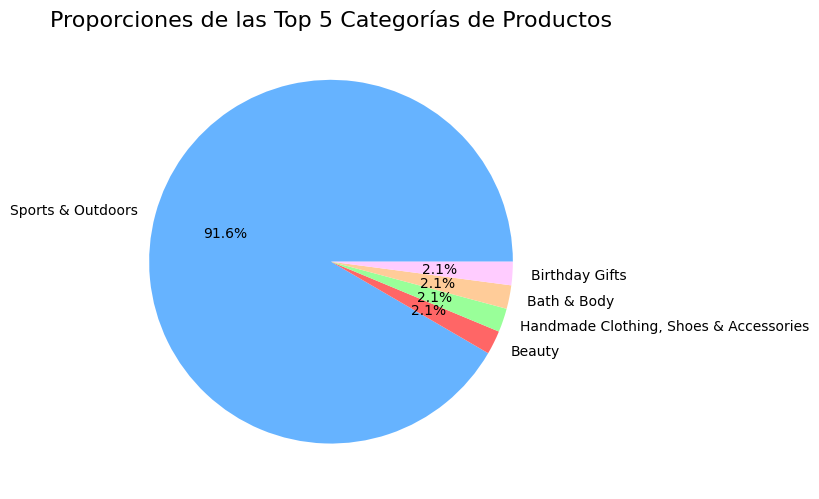

In [35]:
# Gráfico Circular para Visualizar las Proporciones de las Categorías Principales

# Crear un gráfico circular (pastel) para las 5 categorías más frecuentes
plt.figure(figsize=(8, 8))  # Ajustar el tamaño del gráfico
top_5_categorias.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff6666', '#99ff99', '#ffcc99', '#ffccff'], legend=False)

# Añadir título
plt.title('Proporciones de las Top 5 Categorías de Productos', fontsize=16)

# Mostrar el gráfico
plt.ylabel('')  # Quitar la etiqueta del eje y
plt.tight_layout()
plt.show()

In [36]:
"""

Parte 2: Profundizar en la fijación de precios de los productos
    Pregunta de negocio: ¿Cómo se fijan los precios de los productos en Amazon España, 
    y hay puntos o rangos de precios específicos que son más comunes?

Medidas de centralidad:
    Calcular la media, la mediana y la moda del precio de los productos.
    ¿Cuál es el precio medio de los productos? ¿Cómo se compara con el precio más común (moda)?

Medidas de Dispersión:
    Determine la varianza, la desviación estándar, el rango y el rango intercuartílico para el precio del producto.
    ¿En qué medida varían los precios de los productos? ¿Existen indicadores de una dispersión significativa en los precios?

Visualizaciones:
    ¿Existe un rango de precios específico en el que se sitúe la mayoría de los productos? 
    Traza un histograma para visualizar la distribución de los precios de los productos. Si resulta difícil leer estos diagramas, 
    piensa a qué se debe y explica cómo podría solucionarse..
    ¿Hay productos cuyo precio es significativamente superior al resto? 
    Utiliza un diagrama de cajas para mostrar la dispersión y los posibles valores atípicos en los precios de los productos.

"""


'\n\nParte 2: Profundizar en la fijación de precios de los productos\n    Pregunta de negocio: ¿Cómo se fijan los precios de los productos en Amazon España, \n    y hay puntos o rangos de precios específicos que son más comunes?\n\nMedidas de centralidad:\n    Calcular la media, la mediana y la moda del precio de los productos.\n    ¿Cuál es el precio medio de los productos? ¿Cómo se compara con el precio más común (moda)?\n\nMedidas de Dispersión:\n    Determine la varianza, la desviación estándar, el rango y el rango intercuartílico para el precio del producto.\n    ¿En qué medida varían los precios de los productos? ¿Existen indicadores de una dispersión significativa en los precios?\n\nVisualizaciones:\n    ¿Existe un rango de precios específico en el que se sitúe la mayoría de los productos? \n    Traza un histograma para visualizar la distribución de los precios de los productos. Si resulta difícil leer estos diagramas, \n    piensa a qué se debe y explica cómo podría solucionars

In [37]:
# Estadísticas descriptivas sobre la columna de 'Precio'
precio_stats = df['price'].describe()

# Mostrar las estadísticas
precio_stats

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [38]:
# Calcular la media del precio
precio_media = df['price'].mean()

# Mostrar el resultado
print(f'El precio medio de los productos es: {precio_media:.2f} €')

El precio medio de los productos es: 89.24 €


In [39]:
# Calcular la mediana del precio
precio_mediana = df['price'].median()

# Mostrar el resultado
print(f'El precio mediano de los productos es: {precio_mediana:.2f} €')

El precio mediano de los productos es: 19.09 €


In [40]:
# Calcular la moda del precio
precio_moda = df['price'].mode()

# Mostrar el resultado (la moda puede ser múltiple, así que mostramos todos los valores)
print(f'Los precios más comunes (moda) son: {precio_moda.values}')

Los precios más comunes (moda) son: [9.99]


In [41]:
# Comparar la media y la moda
print(f'Comparación: \n - Precio medio: {precio_media:.2f} € \n - Precio más común (moda): {precio_moda.values[0]:.2f} €')

Comparación: 
 - Precio medio: 89.24 € 
 - Precio más común (moda): 9.99 €


In [42]:
# Calcular la varianza del precio
varianza_precio = df['price'].var()

# Mostrar el resultado
print(f'La varianza del precio de los productos es: {varianza_precio:.2f}')

La varianza del precio de los productos es: 119445.49


In [43]:
# Calcular la desviación estándar del precio
desviacion_precio = df['price'].std()

# Mostrar el resultado
print(f'La desviación estándar del precio de los productos es: {desviacion_precio:.2f}')


La desviación estándar del precio de los productos es: 345.61


In [44]:
# Calcular el rango (diferencia entre el precio máximo y el precio mínimo)
rango_precio = df['price'].max() - df['price'].min()

# Mostrar el resultado
print(f'El rango del precio de los productos es: {rango_precio:.2f}')

El rango del precio de los productos es: 100000.00


In [45]:
# Calcular el rango intercuartílico (IQR)
q1 = df['price'].quantile(0.25)  # Primer cuartil
q3 = df['price'].quantile(0.75)  # Tercer cuartil
iqr_precio = q3 - q1

# Mostrar el resultado
print(f'El rango intercuartílico (IQR) del precio de los productos es: {iqr_precio:.2f}')

El rango intercuartílico (IQR) del precio de los productos es: 36.00


In [ ]:
"""
Para visualizar y analizar la distribución de los precios de los productos en Amazon España, y responder a las preguntas planteadas, podemos utilizar dos gráficos clave:

Histograma: Para ver cómo se distribuyen los precios a lo largo de un rango determinado.
Diagrama de Caja (Box Plot): Para visualizar la dispersión de los precios y los posibles valores atípicos (outliers).
"""


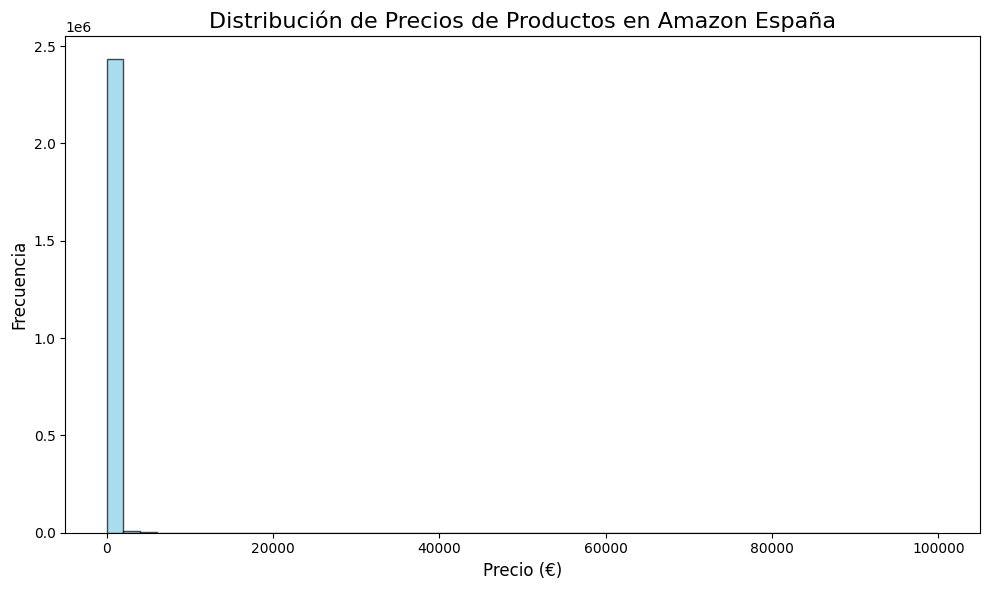

In [47]:
# Histograma de los precios
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Títulos y etiquetas
plt.title('Distribución de Precios de Productos en Amazon España', fontsize=16)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
"""Solución al rango amplio:
Si tienes precios extremos (productos muy caros), puede que desees restringir el rango para centrarte en los productos con precios más "típicos". 
Por ejemplo, puedes excluir los precios mayores a 500 €."""

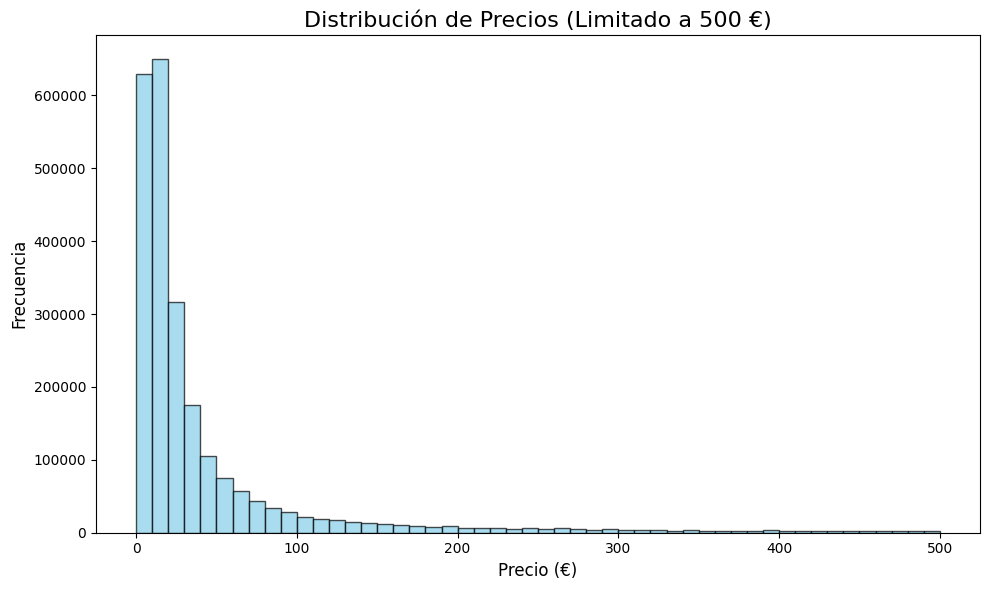

In [49]:
# Limitar los precios a un máximo de 500 €
df_limited = df[df['price'] <= 500]

# Histograma con el rango limitado
plt.figure(figsize=(10, 6))
df_limited['price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Títulos y etiquetas
plt.title('Distribución de Precios (Limitado a 500 €)', fontsize=16)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

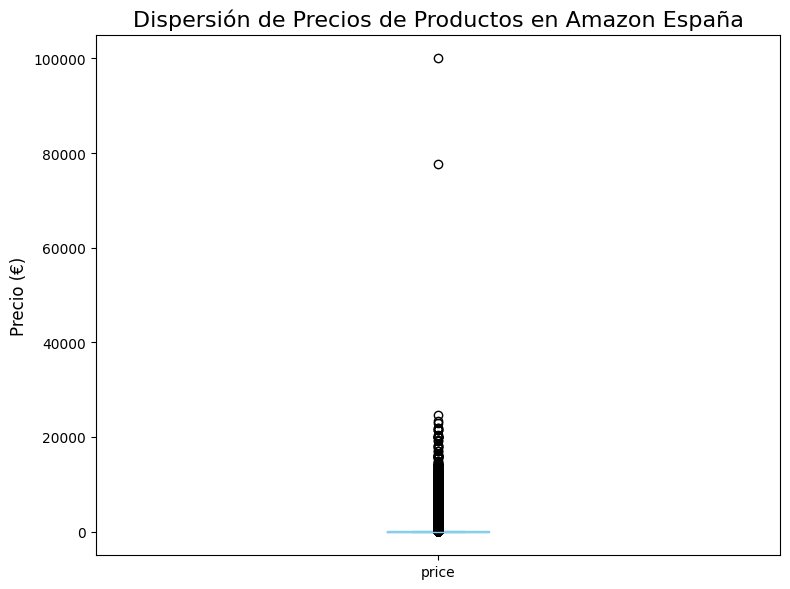

In [51]:
# Diagrama de caja para visualizar la dispersión de los precios y detectar valores atípicos
plt.figure(figsize=(8, 6))
df['price'].plot(kind='box', color='skyblue')

# Títulos y etiquetas
plt.title('Dispersión de Precios de Productos en Amazon España', fontsize=16)
plt.ylabel('Precio (€)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
"""
Parte 3: Desembalaje de las clasificaciones de productos
    Pregunta empresarial: ¿Cómo valoran los clientes los productos en Amazon España? ¿Existen patrones o tendencias en las valoraciones?
    
Medidas de centralidad:
    Calcule la media, la mediana y la moda para la valoración de los productos.
    ¿Cómo valoran generalmente los clientes los productos? ¿Existe una tendencia común?  

Medidas de dispersión:
    Determine la varianza, la desviación estándar y el rango intercuartílico de la valoración del producto.
    ¿Las valoraciones son coherentes o hay una gran variación en las opiniones de los clientes?

Forma de la distribución:
    Calcule la asimetría y la curtosis de la columna de valoraciones.
    ¿Están las valoraciones distribuidas normalmente, o se inclinan hacia valores más altos o más bajos?   

Visualizaciones:
Trace un histograma para visualizar la distribución de las valoraciones de los productos. 
¿Hay alguna valoración específica que sea más común?    
    
"""

In [52]:
# Calcular la media, mediana y moda de las valoraciones
media_valoracion = df['stars'].mean()
mediana_valoracion = df['stars'].median()
moda_valoracion = df['stars'].mode().values[0]

# Mostrar los resultados
print(f'Media de las valoraciones: {media_valoracion:.2f}')
print(f'Mediana de las valoraciones: {mediana_valoracion}')
print(f'Moda de las valoraciones: {moda_valoracion}')

Media de las valoraciones: 2.15
Mediana de las valoraciones: 0.0
Moda de las valoraciones: 0.0


In [53]:
# Calcular la varianza, desviación estándar y rango intercuartílico
varianza_valoracion = df['stars'].var()
desviacion_estandar_valoracion = df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr_valoracion = q3 - q1

# Mostrar los resultados
print(f'Varianza de las valoraciones: {varianza_valoracion:.2f}')
print(f'Desviación estándar de las valoraciones: {desviacion_estandar_valoracion:.2f}')
print(f'Rango intercuartílico (IQR) de las valoraciones: {iqr_valoracion:.2f}')

Varianza de las valoraciones: 4.82
Desviación estándar de las valoraciones: 2.19
Rango intercuartílico (IQR) de las valoraciones: 4.40


In [54]:
# Calcular la asimetría y la curtosis de las valoraciones
asimetria_valoracion = df['stars'].skew()
curtosis_valoracion = df['stars'].kurt()

# Mostrar los resultados
print(f'Asimetría de las valoraciones: {asimetria_valoracion:.2f}')
print(f'Curtosis de las valoraciones: {curtosis_valoracion:.2f}')

Asimetría de las valoraciones: 0.08
Curtosis de las valoraciones: -1.93


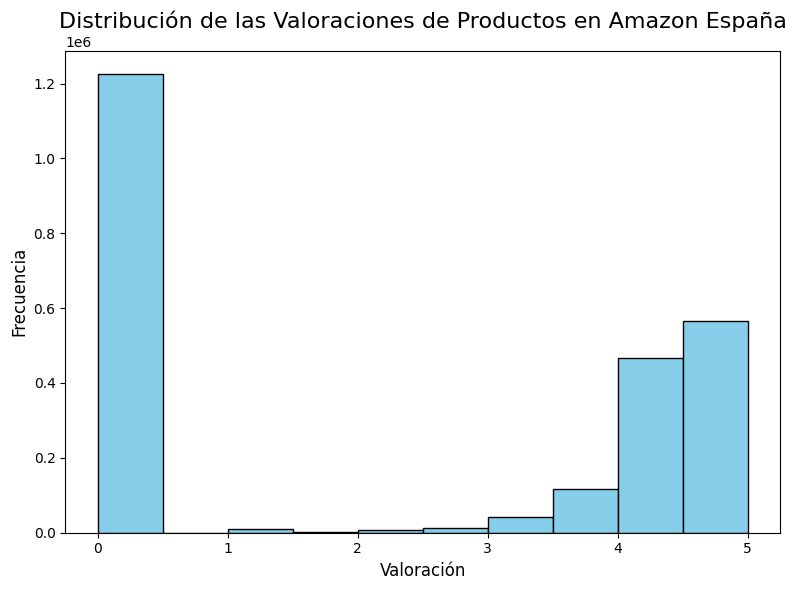

In [56]:
# Graficar el histograma para las valoraciones
plt.figure(figsize=(8, 6))
df['stars'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de las Valoraciones de Productos en Amazon España', fontsize=16)
plt.xlabel('Valoración', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()